<a href="https://colab.research.google.com/github/ivnlee/tec-mna-nlp/blob/main/semana-10/Equipo13_semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformer GPT y Web-Scraping

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd

De la siguiente liga de Tripadvisor selecciona un hotel en la zona de la ciudad de Monterrey, México, que consideres adecuado para extraer los comentarios de español y evaluaciones de usuarios:

https://www.tripadvisor.es/Hotels-g150782-Monterrey_Northern_Mexico-Hotels.html

### 1. Mediante web scraping realiza una extracción de los comentarios y calificaciones a dicho hotel. Recuerda que Tripadvisor representa las calificaciones mediante círculos verdes. Los comentarios deben ser de usuarios que los redactaron en idioma en español. Indica la cantidad de comentarios y sus calificaciones que extrajiste.

In [ ]:
url = "https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html"

html = requests.get(url,
                    headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
                    )

print(html.status_code)

200


In [ ]:
links = []

max_or_num = 1960  # 1964 reseñas en español.

reviews_x_pages = 5    # 5 reseñas por pagina

for k in range(0, max_or_num, reviews_x_pages):
  a = url
  if k == 0:
    ss = '{}'     # Para la primera página es el -or con valor vacío.
  else:
    ss = str(k)  # convertimos a string el valor numérico.
  a = a[:(a.find('Reviews')+7)] + '-or' + ss + a[(a.find('Reviews')+7):]  # Los índices de "Reviews" van de 0 a 6, ya que tiene 7 letras.
  links.append(a)

# Imprimimos los primeros 10
links[0:10]

['https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or{}-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or5-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or10-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or15-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or20-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or25-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-g150782-d2366469-Reviews-or30-IStay_Hotel_Monterrey_Historico-Monterrey_Northern_Mexico.html',
 'https://www.tripadvisor.es/Hotel_Review-

In [2]:
from random import randint
from time import sleep
import re

In [ ]:
reviews = []
stars = []

numpages = int( max_or_num / reviews_x_pages )

for link in links[0:numpages]:

  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)

  sleep(randint(1,5))

  # objeto de la librería BeautifulSoup para llevar a cabo nuestra tarea
  bsobj2 = soup(html2.content,'lxml')

  for review in bsobj2.findAll('span', {'class' : 'QewHA'}):
      reviews.append(review.text.strip())

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

  # Extraigamos también las calificaciones (estrellas):
  for cal in bsobj3.findAll('div', {'class' : 'Hlmiy'}):
    # Extraemos solo la calificacion (en este caso: 10, 20, 30, 40 o 50)
    cal = re.findall(r'\d{2}', ' '.join(str(x) for x in cal))

    stars.append(cal)

In [ ]:
# Imprimimos los primeros 3 comentrios y su calificación
for i in range(3):
   print(reviews[i])
   print(stars[i])

Estuve en el IStay Monterrey para el festival P´al Norte, la habitación durante esos días estaba en casi 5000 pesos la noche, por lo que se esperaría al menos un lugar digno para descansar. El lobby no tiene buen aspecto y el acceso es por un estacionamiento, la alfombra del piso del piso en el que estaba mi habitación por alguna razón se inundó y apestaba desde la  escalera hasta el cuarto a humedad terrible.  Los colchones de las camas están aguados y terribles y las sábanas se sienten viejas.  Las almohadas delgadas e  incómodas. Al baño le hace falta mantenimiento, pero estaba limpio.  El personal del lobby muy amable y ágil, excelente servicio ahí.  La ubicación es buena, pues está muy conectado y en el centro de la ciudad. sin embargo la calle lateral se percibe insegura.
['20']
Las habitaciones están algo descuidadas, no como muestra en la foto donde se ven mejor. La lámpara del techo estaba sucia y con muchos insectos muertos. El sistema de salida de agua de la regadera-tina de

**Cantidad de comentarios y calificaciones extraídas:**

In [ ]:
print('Cantidad de comentarios:', len(reviews), '\nCantidad de calificaciones:', len(stars))

Cantidad de comentarios: 1960 
Cantidad de calificaciones: 1960


### 2. Para considerarlo como un problema binario, convierte las calificaciones a valores de 0 (comentario negativo) y 1 (comentario positivo).

###**a.** En particular indica cómo considerarás las calificaciones entre 3 y 4, como 3.5, por ejemplo. Justifica la decisión tomada.

In [ ]:
df_review = pd.DataFrame(reviews, columns=['review'])
df_stars = pd.DataFrame(stars, columns=['stars'])

df = pd.concat([df_review, df_stars], axis=1)
df.head()

,review,stars
0,Estuve en el IStay Monterrey para el festival ...,20
1,"Las habitaciones están algo descuidadas, no co...",30
2,le falta mucho mantenimiento ya es un hotel vi...,20
3,Hice la reservación pero no me quedé ya que en...,30
4,"Un hotel muy limpio, seguro y tranquilo además...",50


In [ ]:
for i in range(len(df['stars'])):
  if int(df['stars'][i]) >= 40:
    df['stars'][i] = 1
  else:
    df['stars'][i] = 0

df.head()

,review,stars
0,Estuve en el IStay Monterrey para el festival ...,0
1,"Las habitaciones están algo descuidadas, no co...",0
2,le falta mucho mantenimiento ya es un hotel vi...,0
3,Hice la reservación pero no me quedé ya que en...,0
4,"Un hotel muy limpio, seguro y tranquilo además...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1960 non-null   object
 1   stars   1960 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB


In [ ]:
# Guardamos dtaframe como CSV para utilizarlo posteriormente
##
#df.to_csv('/content/drive/MyDrive/NLP/semana-10/tripadvisor_istay_mty.csv')

###**b.** Indica la proporción de comentarios positivos y negativos que tienes ahora.

<Axes: title={'center': 'Distribución de Clases'}, ylabel='Frequency'>

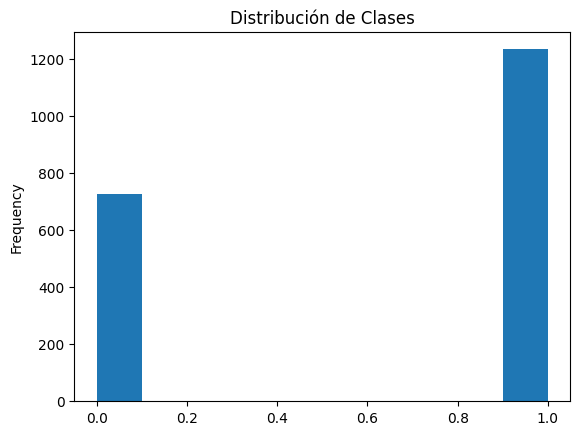

In [3]:
df = pd.read_csv('/content/drive/MyDrive/NLP/semana-10/tripadvisor_istay_mty.csv', index_col=0)

df['stars'].plot(kind='hist', title='Distribución de Clases')

In [17]:
df['stars'].value_counts()

1    1233
0     727
Name: stars, dtype: int64

### 3. Selecciona y aplica un modelo Transformer generador de texto en español de la plataforma de HuggingFace para “balancear” los porcentajes de comentarios positivos y negativos.

### Indica la cantidad de datos sintéticos que vas a generar, en particular contesta las siguientes preguntas:
* **a. ¿Vas a generar solo datos de la clase negativa minoritaria o de ambas clases? ¿Por qué?**

* **b. ¿Qué porcentaje de nuevo balanceo de clases vas a generar? ¿Por qué?**

*NOTA: Recuerda que no siempre es lo mejor balancearlos al 50% cada clase, porque si el conjunto original está demasiado desbalanceado y los datos sintéticos generados son de muy buena calidad, los resultados obtenidos al final podrían ser bastante desastrosos.*

In [4]:
!pip install transformers
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 8.7 MB/s eta 0:00:00


In [5]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [6]:
model = 'jalbarracin/spanish-alpaca-mT5'
model_tokenizer = 'jalbarracin/spanish-alpaca-mT5'
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)
model = AutoModelForSeq2SeqLM.from_pretrained(model).to('cpu') #cambiar a 'cuda' para usar GPU

Some weights of MT5ForConditionalGeneration were not initialized from the model checkpoint at jalbarracin/spanish-alpaca-mT5 and are newly initialized: ['decoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
# Aqui siempre debes comenzar el prompt con "instrut5:"
prompt ="""instrut5: Escribe comentario negativo sobre el mal servicio de un Hotel<in></in>"""
inputs = tokenizer(prompt, return_tensors="pt").to('cpu') #cambiar a 'cuda' para usar GPU

In [18]:
outputs = model.generate(inputs["input_ids"],
                         do_sample = True,
                         max_length = 120,
                         num_return_sequences=6,
                         top_k=50,
                         top_p=0.90,
                        )
detok_outputs = [tokenizer.decode(x, skip_special_tokens=True) for x in outputs]

for output in detok_outputs:
    print(output)
    print("\n")

El mal servicio de un hotel puede ser menores de acuerdo con las expectativas del cliente. En algunos casos, el hotel no limpió o funcionó sin ejercicios extraños, lo que resultó en una falta de variedad y retrasos. Además, hubo problemas con la seguridad del cliente, como la falta de soporte al cliente y la imposibilidad de ver el hotel como óptimo para los clientes.


El peor servicio del hotel en el pasado fue poco servicial y no servicial. El personal se quedó despedido y no se aseguró de que estuviera limpio y exhausto.


El peor servicio en el Hotel fue a menudo mencionado por un personal amable que pudo disfrutar de la comida y la ropa de sus habitaciones. La comida no estaba limpia, los clientes se quedaron despidos y el personal no podía acceder a la habitación. Además, el personal era difícil de amarse a ellos, por lo que me contacté para que podrían ofrecer la comida a otros.


El mal servicio de un hotel no fue éxito - el personal se negó a hacer nada, había fallado dos vec